Install the required packages

In [1]:
! pip install git+https://github.com/abelcarreras/posym.git


zsh:1: command not found: pip


Import necessary modules

In [2]:
from posym.basis import PrimitiveGaussian, BasisFunction
from posym import SymmetryFunction, SymmetryModes, SymmetryBase
import posym.algebra as al
import matplotlib.pyplot as plt
import numpy as np

## Working with basis functions
Posym includes a basis function module that allows to define and manipulate basis functions
build from gaussian primitives. BasisFunction objects form an algebraic structure in which the
product, addition and scaling (product by a scalar) are defined. These operations between two objects results in another
object of the same type. Additionally these objects implement the method *integrate* which computes
the analytic integral of the function from -inf to +inf. This integral is implemented in a C extension
to improve its performance.
In this example I use the water molecule to illustrate the use of the basis function module to compute
and visualize some quantum chemistry objects.

Define STO-3G basis for H2O molecule using the PrimitiveGaussian and BasisFunction classes

In [3]:
"""
$basis
*
h STO-3G
*
    3   s
      0.3425250914D+01       0.1543289673D+00
      0.6239137298D+00       0.5353281423D+00
      0.1688554040D+00       0.4446345422D+00
*
o STO-3G
*
    3   s
      0.1307093214D+03       0.1543289673D+00
      0.2380886605D+02       0.5353281423D+00
      0.6443608313D+01       0.4446345422D+00
    3   s
      0.5033151319D+01      -0.9996722919D-01
      0.1169596125D+01       0.3995128261D+00
      0.3803889600D+00       0.7001154689D+00
    3   p
      0.5033151319D+01       0.1559162750D+00
      0.1169596125D+01       0.6076837186D+00
      0.3803889600D+00       0.3919573931D+00
*
$end

# coordinates in bohr
        X         Y          Z
O   0.000000  0.0000000  -0.0808819
H  -1.432620  0.0000000  -1.2823700
H   1.432620  0.0000000  -1.2823700

"""

'\n$basis\n*\nh STO-3G\n*\n    3   s\n      0.3425250914D+01       0.1543289673D+00\n      0.6239137298D+00       0.5353281423D+00\n      0.1688554040D+00       0.4446345422D+00\n*\no STO-3G\n*\n    3   s\n      0.1307093214D+03       0.1543289673D+00\n      0.2380886605D+02       0.5353281423D+00\n      0.6443608313D+01       0.4446345422D+00\n    3   s\n      0.5033151319D+01      -0.9996722919D-01\n      0.1169596125D+01       0.3995128261D+00\n      0.3803889600D+00       0.7001154689D+00\n    3   p\n      0.5033151319D+01       0.1559162750D+00\n      0.1169596125D+01       0.6076837186D+00\n      0.3803889600D+00       0.3919573931D+00\n*\n$end\n\n# coordinates in bohr\n        X         Y          Z\nO   0.000000  0.0000000  -0.0808819\nH  -1.432620  0.0000000  -1.2823700\nH   1.432620  0.0000000  -1.2823700\n\n'

In [4]:
# Oxigen atom
sa = PrimitiveGaussian(alpha=130.70932)
sb = PrimitiveGaussian(alpha=23.808861)
sc = PrimitiveGaussian(alpha=6.4436083)
s_O = BasisFunction([sa, sb, sc],
                    [0.154328969, 0.535328136, 0.444634536],
                    center=[0.0000000000, 0.000000000, -0.0808819]) # Bohr

sa = PrimitiveGaussian(alpha=5.03315132)
sb = PrimitiveGaussian(alpha=1.1695961)
sc = PrimitiveGaussian(alpha=0.3803890)
s2_O = BasisFunction([sa, sb, sc],
                     [-0.099967228, 0.399512825, 0.700115461],
                     center=[0.0000000000, 0.000000000, -0.0808819])

pxa = PrimitiveGaussian(alpha=5.0331513, l=[1, 0, 0])
pxb = PrimitiveGaussian(alpha=1.1695961, l=[1, 0, 0])
pxc = PrimitiveGaussian(alpha=0.3803890, l=[1, 0, 0])

pya = PrimitiveGaussian(alpha=5.0331513, l=[0, 1, 0])
pyb = PrimitiveGaussian(alpha=1.1695961, l=[0, 1, 0])
pyc = PrimitiveGaussian(alpha=0.3803890, l=[0, 1, 0])

pza = PrimitiveGaussian(alpha=5.0331513, l=[0, 0, 1])
pzb = PrimitiveGaussian(alpha=1.1695961, l=[0, 0, 1])
pzc = PrimitiveGaussian(alpha=0.3803890, l=[0, 0, 1])

px_O = BasisFunction([pxa, pxb, pxc],
                     [0.155916268, 0.6076837186, 0.3919573931],
                     center=[0.0000000000, 0.000000000, -0.0808819])
py_O = BasisFunction([pya, pyb, pyc],
                     [0.155916268, 0.6076837186, 0.3919573931],
                     center=[0.0000000000, 0.000000000, -0.0808819])
pz_O = BasisFunction([pza, pzb, pzc],
                     [0.155916268, 0.6076837186, 0.3919573931],
                     center=[0.0000000000, 0.000000000, -0.0808819])

# Hydrogen atoms
sa = PrimitiveGaussian(alpha=3.42525091)
sb = PrimitiveGaussian(alpha=0.62391373)
sc = PrimitiveGaussian(alpha=0.1688554)
s_H = BasisFunction([sa, sb, sc],
                    [0.154328971, 0.535328142, 0.444634542],
                    center=[-1.43262, 0.000000000, -1.28237])

s2_H = BasisFunction([sa, sb, sc],
                     [0.154328971, 0.535328142, 0.444634542],
                     center=[1.43262, 0.000000000, -1.28237])

basis_set = [s_O, s2_O, px_O, py_O, pz_O, s_H, s2_H]

BasisFunction objects can be called as usual functions that may be plotted and evaluated.
Here I plot the S and PX functions centered on the oxygen atom.

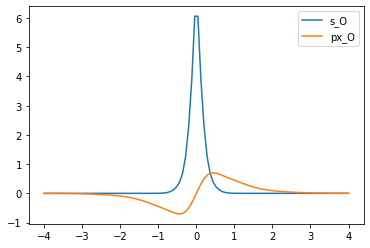

In [5]:
xrange = np.linspace(-4, 4, 100)
yrange = np.zeros_like(xrange)
zrange = np.zeros_like(xrange)

plt.plot(xrange, s_O(xrange, yrange, zrange), label='s_O')
plt.plot(xrange, px_O(xrange, yrange, zrange), label='px_O')
plt.legend()

Using BasisFunctions it is possible to build molecular orbitals from MO coefficients
by simple linear combination of basis functions operated by real coefficients.


In [6]:
"""
MO Coefficients

 [[ 0.994216442, 0.025846814, 0.000000000, 0.000000000,-0.004164076,-0.005583712, -0.005583712],
  [ 0.233766661,-0.844456594, 0.000000000, 0.000000000, 0.122829781,-0.155593214, -0.155593214],
  [ 0.000000000, 0.000000000, 0.612692349, 0.000000000, 0.000000000,-0.449221684,  0.449221684],
  [-0.104033343, 0.538153649, 0.000000000, 0.000000000, 0.755880259,-0.295107107, -0.295107107],
  [ 0.000000000, 0.000000000, 0.000000000,-1.000000000, 0.000000000, 0.000000000,  0.000000000],
  [-0.125818566, 0.820120983, 0.000000000, 0.000000000,-0.763538862,-0.769155124, -0.769155124],
  [ 0.000000000, 0.000000000, 0.959800163, 0.000000000, 0.000000000, 0.814629717, -0.814629717]]
"""

'\nMO Coefficients\n\n [[ 0.994216442, 0.025846814, 0.000000000, 0.000000000,-0.004164076,-0.005583712, -0.005583712],\n  [ 0.233766661,-0.844456594, 0.000000000, 0.000000000, 0.122829781,-0.155593214, -0.155593214],\n  [ 0.000000000, 0.000000000, 0.612692349, 0.000000000, 0.000000000,-0.449221684,  0.449221684],\n  [-0.104033343, 0.538153649, 0.000000000, 0.000000000, 0.755880259,-0.295107107, -0.295107107],\n  [ 0.000000000, 0.000000000, 0.000000000,-1.000000000, 0.000000000, 0.000000000,  0.000000000],\n  [-0.125818566, 0.820120983, 0.000000000, 0.000000000,-0.763538862,-0.769155124, -0.769155124],\n  [ 0.000000000, 0.000000000, 0.959800163, 0.000000000, 0.000000000, 0.814629717, -0.814629717]]\n'

In [7]:
# Orbital 1
o1 = s_O * 0.994216442 + s2_O * 0.025846814 + px_O * 0.0 + py_O * 0.0 + pz_O * -0.004164076 + s_H * -0.005583712 + s2_H * -0.005583712

# Orbital 2
o2 = s_O * 0.23376666 + s2_O * -0.844456594 + px_O * 0.0 + py_O * 0.0 + pz_O * 0.122829781 + s_H * -0.155593214 + s2_H * -0.155593214

# Orbital 3
o3 = s_O * 0.0 + s2_O * 0.0 + px_O * 0.612692349 + py_O * 0.0 + pz_O * 0.0 + s_H * -0.44922168 + s2_H * 0.449221684

# Orbital 4
o4 = s_O * -0.104033343 + s2_O * 0.538153649 + px_O * 0.0 + py_O * 0.0 + pz_O * 0.755880259 + s_H * -0.295107107 + s2_H * -0.2951071074

# Orbital 5
o5 = s_O * 0.0 + s2_O * 0.0 + px_O * 0.0 + py_O * -1.0 + pz_O * 0.0 + s_H * 0.0 + s2_H * 0.0

# Orbital 6
o6 = s_O * -0.125818566 + s2_O * 0.820120983 + px_O * 0.0 + py_O * 0.0 + pz_O * -0.763538862 + s_H * -0.769155124 + s2_H * -0.769155124

The scalar product between to BasisFunctions is obtained by using the product (*) operator and the integrate method.

In [8]:
print('<o1|o1>: ', (o1*o1).integrate)
print('<o2|o2>: ', (o2*o2).integrate)
print('<o1|o2>: ', (o1*o2).integrate)


<o1|o1>:  1.0000000088752232
<o2|o2>:  0.9999989709860797
<o1|o2>:  9.550356693162083e-08


BasisFunction can be modified by applying linear transformations. This is done using *apply_linear_transformation()* method.
For convenience, two usual transformations (rotations and translations) are specifically implemented.

In [9]:
o3_rot = o3.copy()
o3_rot.apply_rotation(-np.pi/2, [1, 0, 0])
o3_rot.apply_translation([0, +0.5, 0])

For convenience, BasisFunctions objects can be called in a vectorized-like way. This is
useful to plot slices (2D plots) of these functions.

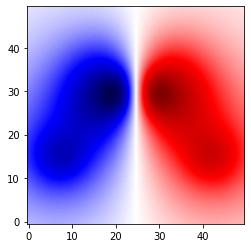

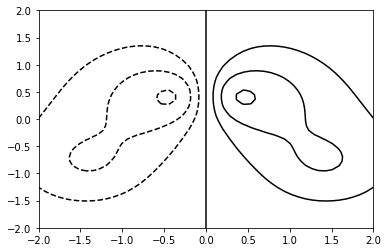

In [10]:
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)

X, Y = np.meshgrid(x, y)

Z = o3_rot(X, Y, np.zeros_like(X))
plt.imshow(Z, interpolation='bilinear', origin='lower', cmap='seismic')
plt.figure()
plt.contour(X, Y, Z, colors='k')

## Symmetry analysis
Posym implements a basic class for symmetry handling (SymmetryBase). These symmetry objects also form an algebraic
structure in which the product (direct product) addition and scaling are defined. From this base class other
subclasses are created to implement the symmetry of specific objects.

In this example I show the use of these classes to perform a basic symmetry analysis of the molecular orbitals,
wave function and electronic density of water molecule. Also this can be used to analyze the symmetry of quantum
mechanics operator matrices defined in the same basis set.

Electronic density matrix can be build from the molecular orbitals and its occupation. From this density matrix,
the actual density function can be easily obtained using the basis set. For convenience, this is implemented
in a simple function: *build_density()*.

In [11]:
mo_coefficients = [[ 0.994216442,  0.025846814, 0.000000000,  0.000000000, -0.004164076, -0.005583712, -0.005583712],
                   [ 0.233766661, -0.844456594, 0.000000000,  0.000000000,  0.122829781, -0.155593214, -0.155593214],
                   [ 0.000000000,  0.000000000, 0.612692349,  0.000000000,  0.000000000, -0.449221684,  0.449221684],
                   [-0.104033343,  0.538153649, 0.000000000,  0.000000000,  0.755880259, -0.295107107, -0.295107107],
                   [ 0.000000000,  0.000000000, 0.000000000, -1.000000000,  0.000000000,  0.000000000,  0.000000000],
                   [-0.125818566,  0.820120983, 0.000000000,  0.000000000, -0.763538862, -0.769155124, -0.769155124],
                   [ 0.000000000,  0.000000000, 0.959800163,  0.000000000,  0.000000000,  0.814629717, -0.814629717]]

coordinates = [[ 0.00000, 0.0000000, -0.0808819],
               [-1.43262, 0.0000000, -1.2823700],
               [ 1.43262, 0.0000000, -1.2823700]]

symbols = ['O', 'H', 'H']

density_matrix = 0 * np.outer(mo_coefficients[0], mo_coefficients[0]) + \
                 0 * np.outer(mo_coefficients[1], mo_coefficients[1]) + \
                 2 * np.outer(mo_coefficients[2], mo_coefficients[2]) + \
                 2 * np.outer(mo_coefficients[3], mo_coefficients[3]) + \
                 0 * np.outer(mo_coefficients[4], mo_coefficients[4]) + \
                 0 * np.outer(mo_coefficients[5], mo_coefficients[5]) + \
                 0 * np.outer(mo_coefficients[6], mo_coefficients[6])

def build_density(basis_set, density_matrix):
    density_matrix = np.array(density_matrix)
    density = BasisFunction([], [])
    for i, basis1 in enumerate(basis_set):
        for j, basis2 in enumerate(basis_set):
            density += basis1*basis2 * density_matrix[i, j]

    return density

f_density = build_density(basis_set, density_matrix)
print('density integral: ', f_density.integrate)

density integral:  4.00000021709998


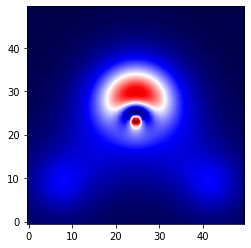

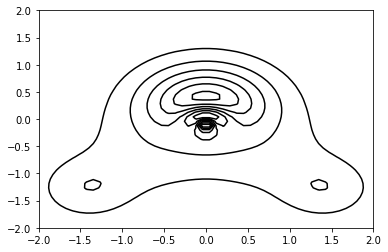

In [12]:
X, Y = np.meshgrid(x, y)
f_density.apply_rotation(-np.pi/2, [1, 0, 0])
Z = f_density(X, Y, np.zeros_like(X))
plt.imshow(Z, interpolation='bilinear', origin='lower', cmap='seismic')
plt.figure()
plt.contour(X, Y, Z, colors='k')

The density function symmetry is analyzed using SymmetryFunction class. This class works for functions defined
with PrimitiveGaussian and BasisFunction objects. This returns a symmetry object.

In [13]:
sym_density = SymmetryFunction('c2v', f_density)
print('Symmetry density: ', sym_density)
print('density self_similarity', sym_density.self_similarity)

KeyboardInterrupt: 

This class can be also used to analyze the symmetry of the molecular orbitals in the same way.

In [ ]:
sym_o1 = SymmetryFunction('c2v', o1)
sym_o2 = SymmetryFunction('c2v', o2)
sym_o3 = SymmetryFunction('c2v', o3)
sym_o4 = SymmetryFunction('c2v', o4)
sym_o5 = SymmetryFunction('c2v', o5)
sym_o6 = SymmetryFunction('c2v', o6)

print('Symmetry O1: ', sym_o1)
print('Symmetry O2: ', sym_o2)
print('Symmetry O3: ', sym_o3)
print('Symmetry O4: ', sym_o4)
print('Symmetry O5: ', sym_o5)
print('Symmetry O6: ', sym_o6)

The symmetry of the whole wave function is computed using SymmetryWaveFunction class. The instance of this class
is generated from a list of the occupied alpha and beta orbitals and returns a symmetry object. The following example
computes the symmetry of 3 different electronic configurations.

In [ ]:
from posym import SymmetryWaveFunction

# restricted close shell
sym_wf_gs = SymmetryWaveFunction('c2v',
                                 alpha_orbitals=[o1, o2, o3, o4, o5],
                                 beta_orbitals=[o1, o2, o3, o4, o5])
print('Symmetry WF (ground state): ', sym_wf_gs)

# restricted open shell
sym_wf_excited_1 = SymmetryWaveFunction('c2v',
                                 alpha_orbitals=[o1, o2, o3, o4, o5],
                                 beta_orbitals=[o1, o2, o3, o4, o6])
print('Symmetry WF (excited state 1): ', sym_wf_excited_1)

# restricted close shell
sym_wf_excited_2 = SymmetryWaveFunction('c2v',
                                 alpha_orbitals=[o1, o2, o3, o4, o6],
                                 beta_orbitals=[o1, o2, o3, o4, o6])
print('Symmetry WF (excited state 2): ', sym_wf_excited_2)

The symmetry of simple wave functions (with no degenerated symmetries) can be also obtained by the product of the
symmetry of the different occupied orbitals. The following example illustrates this by building the symmetry
of the previous electronic configurations using orbital symmetry products.

In [ ]:
# restricted close shell
sym_wf_gs = sym_o1*sym_o1 * sym_o2*sym_o2 * sym_o3*sym_o3 * sym_o4*sym_o4 * sym_o5*sym_o5
print('Symmetry WF (ground state): ', sym_wf_gs)

# restricted open shell
sym_wf_excited_1 = sym_o1*sym_o1 * sym_o2*sym_o2 * sym_o3*sym_o3 * sym_o4*sym_o4 * sym_o5*sym_o6
print('Symmetry WF (excited state 1): ', sym_wf_excited_1)

# restricted close shell
sym_wf_excited_2 = sym_o1*sym_o1 * sym_o2*sym_o2 * sym_o3*sym_o3 * sym_o4*sym_o4 * sym_o6*sym_o6
print('Symmetry WF (excited state 2): ', sym_wf_excited_2)

The analysis of the symmetry of an operator is performed in the same way as the electronic density.
The following example shows the analysis of dipole moment operator matrix defined in the basis of
the atomic orbitals of H2O molecule.

In [ ]:
# dipole moment operator
dipole_x = [[          0.,          0.,  5.0792e-02,   0.,          0., -2.8130e-03,   2.8130e-03],
            [          0.,          0.,  6.4117e-01,   0.,          0., -2.7580e-01,   2.7580e-01],
            [  5.0792e-02,  6.4117e-01,          0.,   0.,          0.,  4.7462e-01,   4.7462e-01],
            [          0.,          0.,          0.,   0.,          0.,          0.,           0.],
            [          0.,          0.,          0.,   0.,          0.,  1.5329e-01,  -1.5329e-01],
            [ -2.8130e-03, -2.7580e-01,  4.7462e-01,   0.,  1.5329e-01, -1.4326e+00,   6.9389e-18],
            [  2.8130e-03,  2.7580e-01,  4.7462e-01,   0., -1.5329e-01,  6.9389e-18,   1.4326e+00]]


dipole_y = [[     0.,     0.,     0.,   0.0508,     0.,     0.,     0.],
            [     0.,     0.,     0.,   0.6412,     0.,     0.,     0.],
            [     0.,     0.,     0.,       0.,     0.,     0.,     0.],
            [ 0.0508, 0.6412,     0.,       0.,     0., 0.2918, 0.2918],
            [     0.,     0.,     0.,       0.,     0.,     0.,     0.],
            [     0.,     0.,     0.,   0.2918,     0.,     0.,     0.],
            [     0.,     0.,     0.,   0.2918,     0.,     0.,     0.]]

dipole_z = [[  -0.0809,  -0.0191,      0.,      0.,   0.0508,  -0.0064,  -0.0064],
            [  -0.0191,  -0.0809,      0.,      0.,   0.6412,  -0.2680,  -0.2680],
            [       0.,       0., -0.0809,      0.,       0.,   0.1770,  -0.1770],
            [       0.,       0.,      0., -0.0809,       0.,       0.,       0.],
            [   0.0508,   0.6412,      0.,      0.,  -0.0809,   0.4403,   0.4403],
            [  -0.0064,  -0.2680,  0.1770,      0.,   0.4403,  -1.2824,  -0.3217],
            [  -0.0064,  -0.2680, -0.1770,      0.,   0.4403,  -0.3217,  -1.2824]]


f_dipole_x = build_density(basis_set, dipole_x)
f_dipole_y = build_density(basis_set, dipole_y)
f_dipole_z = build_density(basis_set, dipole_z)

sym_dipole_x = SymmetryFunction('c2v', f_dipole_x)
sym_dipole_y = SymmetryFunction('c2v', f_dipole_y)
sym_dipole_z = SymmetryFunction('c2v', f_dipole_z)

print('Symmetry dipole X operator: ', sym_dipole_x)
print('Symmetry dipole Y operator: ', sym_dipole_y)
print('Symmetry dipole Z operator: ', sym_dipole_z)

## Vibrations

The vibrational analysis is performed using the normal modes.
The class SymmetryModes implements the machinery to obtain the
symmetry of the normal modes. The result is a combined symmetry
object containing the symmetry of all normal modes.
The method *get_state_mode()* can be used to get the symmetry
of the individual modes.

In [ ]:
normal_modes = [[[ 0.,     0.,    -0.075],
                 [-0.381, -0.,     0.593],
                 [ 0.381, -0.,     0.593]], # mode 1

                [[-0.   , -0.,     0.044],
                 [-0.613, -0.,    -0.35 ],
                 [ 0.613,  0.,    -0.35 ]], # mode 2

                [[-0.073, -0.,    -0.   ],
                 [ 0.583,  0.,     0.397],
                 [ 0.583,  0.,    -0.397]]] # mode 3

sym_modes_gs = SymmetryModes(group='c2v', coordinates=coordinates, modes=normal_modes, symbols=symbols)
print('Symmetry normal modes: ', sym_modes_gs)

frequencies = [1737.01, 3988.5, 4145.43]
for i in range(len(normal_modes)):
    print('mode {:2}: {:8.3f} :'.format(i + 1, frequencies[i]), sym_modes_gs.get_state_mode(i))

## Transition analysis
The symmetry objects obtained in the previous examples can be operated to obtain the symmetry
of more sophisticated processes. In the following example I compute the symmetry of the transition
between the previously defined electronic states.
In this example I assume an ideal transition between the ground state and the excited state defined previously.


In [ ]:
sym_dipole = sym_dipole_x + sym_dipole_y + sym_dipole_z
transition_1 = sym_wf_gs * sym_dipole * sym_wf_excited_1
transition_2 = sym_wf_gs * sym_dipole * sym_wf_excited_2

print('Transition 1\n-----------------')
print('Transition symmetry', transition_1)

# Projection into the most symmetric representation is proportional to the probability of transition
print('Transition projection: ', al.dot(SymmetryBase('c2v', 'A1'), transition_1))
print('Transition projection (normalized): ', al.dot(SymmetryBase('c2v', 'A1'), transition_1, normalize=True))

print('\nTransition 2\n-----------------')
print('Transition symmetry', transition_2)

# Projection into the most symmetric representation is proportional to the probability of transition
print('Transition projection: ', al.dot(SymmetryBase('c2v', 'A1'), transition_2))
print('Transition projection (normalized): ', al.dot(SymmetryBase('c2v', 'A1'), transition_2, normalize=True))



Assuming the vibrations of normal modes of ground state and excited state are equal we can analyze
the transition symmetry including the vibrations.


In [ ]:
sym_modes_excited = sym_modes_gs

transition_1_m = sym_modes_gs *  sym_wf_gs * sym_dipole * sym_wf_excited_1 * sym_modes_excited
transition_2_m = sym_modes_gs *  sym_wf_gs * sym_dipole * sym_wf_excited_2 * sym_modes_excited

print('Transition 1\n-----------------')
print('Transition symmetry', transition_1_m)

# Projection into the most symmetric representation is proportional to the probability of transition
print('Transition projection: ', al.dot(SymmetryBase('c2v', 'A1'), transition_1_m))
print('Transition projection (normalized): ', al.dot(SymmetryBase('c2v', 'A1'), transition_1_m, normalize=True))

print('\nTransition 2\n-----------------')
print('Transition symmetry', transition_2_m)

# Projection into the most symmetric representation is proportional to the probability of transition
print('Transition projection: ', al.dot(SymmetryBase('c2v', 'A1'), transition_2_m))
print('Transition projection (normalized): ', al.dot(SymmetryBase('c2v', 'A1'), transition_2_m, normalize=True))